In [82]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score,RepeatedStratifiedKFold

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

import imblearn.over_sampling
import imblearn.under_sampling

from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, precision_recall_curve, auc

import seaborn as sns
import matplotlib.pyplot as plt




In [6]:

goodreads_a = pd.read_pickle(r'goodreads_clean.pickle')

In [7]:
goodreads = goodreads_a.reset_index()

In [195]:
X = goodreads.drop(columns=["index","Id","Name","Authors","Publisher","PagesNumber","Description","Subjects","Bestseller","ISBN"])
y = goodreads["Bestseller"]
X, X_test, y, y_test = train_test_split(X,y,test_size = 0.2, random_state = 5)


In [196]:
n_pos = np.sum(y==1)
n_neg = np.sum(y==0)
ratio = {1:n_pos *8,0:n_neg}

#random oversample
ROS = imblearn.over_sampling.RandomOverSampler(sampling_strategy=ratio,random_state=21)
X_rs, y_rs = ROS.fit_resample(X,y)

#smote
smt = imblearn.over_sampling.SMOTE(sampling_strategy=ratio,random_state=21)
X_smt, y_smt = smt.fit_resample(X,y)

In [197]:
under_ratio = {1:15,0:85}

#random undersample
RUS = imblearn.under_sampling.RandomUnderSampler(sampling_strategy=under_ratio,random_state=21)
X_us, y_us = RUS.fit_resample(X,y)

In [198]:
X_train, X_val, y_train, y_val = train_test_split(X,y,test_size=0.25,random_state=10)

X_tr_rs, X_val_rs, y_tr_rs, y_val_rs = train_test_split(X_rs,y_rs,test_size = 0.25, random_state = 10)

X_tr_smt, X_val_smt, y_tr_smt, y_val_smt = train_test_split(X_smt,y_smt,test_size = 0.25, random_state = 10)

X_tr_us, X_val_us, y_tr_us, y_val_us = train_test_split(X_us,y_us,test_size = 0.25, random_state = 10)


In [208]:
lg_base = LogisticRegression(multi_class="ovr",max_iter=10000)
lg_ros = LogisticRegression(multi_class="ovr",max_iter=10000)
lg_smt = LogisticRegression(multi_class="ovr",max_iter=10000)
lg_us = LogisticRegression(multi_class="ovr",max_iter=10000)

In [209]:
lg_base.fit(X_train,y_train)
lg_ros.fit(X_tr_rs,y_tr_rs)
lg_smt.fit(X_tr_smt,y_tr_smt)
lg_us.fit(X_tr_us,y_tr_us)

LogisticRegression(max_iter=10000, multi_class='ovr')

In [210]:
lg_base_pred = lg_base.predict(X_test)
lg_base_prob = lg_base.predict_proba(X_test)
lg_base_prob = lg_base_prob[:,1]
lg_base_precision, lg_base_recall, lg_base_thresholds = precision_recall_curve(y_test, lg_base_prob)
lg_base_f1 = f1_score(y_test,lg_base_pred)
lg_base_auc = auc(lg_base_recall,lg_base_precision)

lg_ros_pred = lg_ros.predict(X_test)
lg_ros_prob = lg_ros.predict_proba(X_test)
lg_ros_prob = lg_ros_prob[:,1]
lg_ros_precision, lg_ros_recall, lg_ros_thresholds = precision_recall_curve(y_test, lg_ros_prob)
lg_ros_f1 = f1_score(y_test,lg_ros_pred)
lg_ros_auc = auc(lg_ros_recall,lg_ros_precision)

lg_smt_pred = lg_smt.predict(X_test)
lg_smt_prob = lg_smt.predict_proba(X_test)
lg_smt_prob = lg_smt_prob[:,1]
lg_smt_precision, lg_smt_recall, lg_smt_thresholds = precision_recall_curve(y_test, lg_smt_prob)
lg_smt_f1 = f1_score(y_test,lg_smt_pred)
lg_smt_auc = auc(lg_smt_recall,lg_smt_precision)

In [211]:
print("base f1: "+str(f1_score(y_val,lg_base.predict(X_val))))
print("ros f1: "+str(f1_score(y_val_rs,lg_ros.predict(X_val_rs))) )
print("smote f1: "+str(f1_score(y_val_smt,lg_smt.predict(X_val_smt))))
print("us f1: "+str(f1_score(y_val_us,lg_us.predict(X_val_us))))

base f1: 0.0
ros f1: 0.4150943396226415
smote f1: 0.17777777777777778
us f1: 1.0


In [212]:
rf_baseline = RandomForestClassifier(n_estimators=100, random_state=1)
rf_baseline.fit(X_train,y_train)

rf_ros = RandomForestClassifier(n_estimators=100, random_state=1)
rf_ros.fit(X_tr_rs,y_tr_rs)

rf_smt = RandomForestClassifier(n_estimators=100, random_state=1)
rf_smt.fit(X_tr_smt,y_tr_smt)

rf_us = RandomForestClassifier(n_estimators=100, random_state=1)
rf_us.fit(X_tr_us,y_tr_us)

RandomForestClassifier(random_state=1)

In [213]:
knn_base = KNeighborsClassifier()
knn_base.fit(X_train,y_train)

knn_ros = KNeighborsClassifier()
knn_ros.fit(X_tr_rs,y_tr_rs)

knn_smt = KNeighborsClassifier()
knn_smt.fit(X_tr_smt,y_tr_smt)

knn_us = KNeighborsClassifier()
knn_us.fit(X_tr_us,y_tr_us)

KNeighborsClassifier()

In [214]:
print("base f1: "+str(f1_score(y_val,knn_base.predict(X_val))))
print("ros f1: "+str(f1_score(y_val_rs,knn_ros.predict(X_val_rs))) )
print("smote f1: "+str(f1_score(y_val_smt,knn_smt.predict(X_val_smt))))
print("us f1: "+str(f1_score(y_val_us,knn_us.predict(X_val_us))))

base f1: 0.0
ros f1: 0.8235294117647058
smote f1: 0.6031746031746031
us f1: 0.8


In [215]:
knn_ros_pred = knn_ros.predict(X_test)
knn_ros_prob = knn_ros.predict_proba(X_test)
knn_ros_prob = knn_ros_prob[:,1]
knn_ros_precision, knn_ros_recall, knn_ros_thresholds = precision_recall_curve(y_test, knn_ros_prob)
knn_ros_f1 = f1_score(y_test,knn_ros_pred)
knn_ros_auc = auc(knn_ros_recall,knn_ros_precision)

In [216]:
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

Random Forest Baseline
precision: 0.0
recall: 0.0
f1: 0.0
training score: 100.0
testing score: 99.91077403524426


/Users/sanciayang/opt/anaconda3/envs/metis/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<AxesSubplot:>

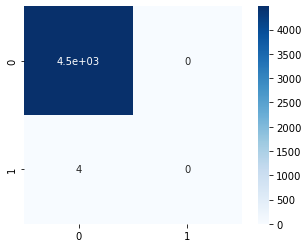

In [64]:
#random forest - baseline
print("Random Forest Baseline")
print("precision: "+str(precision_score(y_val,rf_baseline.predict(X_val))))
print("recall: "+str(recall_score(y_val,rf_baseline.predict(X_val))))
print("f1: "+str(f1_score(y_val,rf_baseline.predict(X_val))))
print("training score: " + str(100*rf_baseline.score(X_train,y_train)))
print("testing score: " + str(100*rf_baseline.score(X_test,y_test)))
base_confusion = confusion_matrix(y_test, rf_baseline.predict(X_test))
sns.heatmap(base_confusion, cmap=plt.cm.Blues,annot=True,square=True)

In [75]:
base_scores = cross_val_score(rf_baseline, X, y, scoring='f1', cv=cv, n_jobs=-1)
print(base_scores)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]


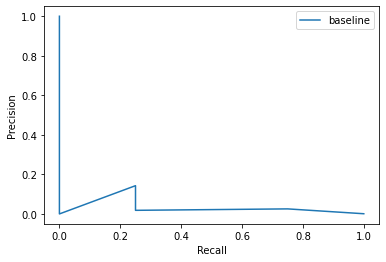

In [84]:

baseline_pred = rf_baseline.predict(X_test)
baseline_prob = rf_baseline.predict_proba(X_test)
baseline_prob = baseline_prob[:,1]
baseline_precision, baseline_recall, baseline_thresholds = precision_recall_curve(y_test, baseline_prob)
baseline_f1 = f1_score(y_test,baseline_pred)
baseline_auc = auc(baseline_recall,baseline_precision)

plt.plot(baseline_recall,baseline_precision,label="baseline")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.legend()
plt.show()



Random Forest with random oversampling
precision: 0.975
recall: 1.0
f1: 0.9873417721518987
training score: 100.0
testing score: 99.86616105286639


<AxesSubplot:>

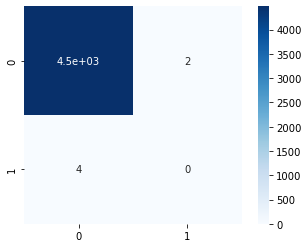

In [217]:
#random forest - random oversampling
print("Random Forest with random oversampling")
print("precision: "+str(precision_score(y_val_rs,rf_ros.predict(X_val_rs))))
print("recall: "+str(recall_score(y_val_rs,rf_ros.predict(X_val_rs))))
print("f1: "+str(f1_score(y_val_rs,rf_ros.predict(X_val_rs))))
print("training score: " + str(100*rf_ros.score(X_tr_rs,y_tr_rs)))
print("testing score: " + str(100*rf_ros.score(X_test,y_test)))
ros_confusion = confusion_matrix(y_test, rf_ros.predict(X_test))
sns.heatmap(ros_confusion, cmap=plt.cm.Blues,annot=True,square=True)

In [77]:
over_scores = cross_val_score(rf_ros, X_rs, y_rs, scoring='f1', cv=cv, n_jobs=-1)
print(over_scores)

[1.   1.   0.96 0.96 1.   1.   1.   1.   1.   1.   1.   1.   1.   1.
 1.   1.   1.   1.   0.96 0.96 0.96 1.   1.   1.   1.   1.   1.   0.96
 1.   1.  ]


In [86]:
over_pred = rf_ros.predict(X_test)
over_prob = rf_ros.predict_proba(X_test)
over_prob = over_prob[:,1]
over_precision, over_recall, over_thresholds = precision_recall_curve(y_test, over_prob)
over_f1 = f1_score(y_test,over_pred)
over_auc = auc(over_recall,over_precision)

Random Forest with SMOTE
precision: 0.9655172413793104
recall: 0.717948717948718
f1: 0.8235294117647058
training score: 100.0
testing score: 99.88846754405532


<AxesSubplot:>

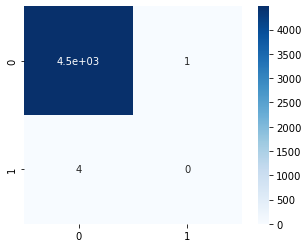

In [218]:
#random forest - SMOTE
print("Random Forest with SMOTE")
print("precision: "+str(precision_score(y_val_smt,rf_smt.predict(X_val_smt))))
print("recall: "+str(recall_score(y_val_smt,rf_smt.predict(X_val_smt))))
print("f1: "+str(f1_score(y_val_smt,rf_smt.predict(X_val_smt))))
print("training score: " + str(100*rf_smt.score(X_tr_smt,y_tr_smt)))
print("testing score: " + str(100*rf_smt.score(X_test,y_test)))
smote_confusion = confusion_matrix(y_test, rf_smt.predict(X_test))
sns.heatmap(smote_confusion, cmap=plt.cm.Blues,annot=True,square=True)

In [201]:
smt_scores = cross_val_score(rf_smt, X_smt, y_smt, scoring='f1', cv=cv, n_jobs=-1)

In [202]:
print(smt_scores)

[0.81818182 0.8        0.96       0.63157895 0.90909091 0.81818182
 0.95652174 0.91666667 0.95652174 0.76190476 0.81818182 0.63157895
 0.90909091 0.95652174 0.90909091 0.95652174 0.76190476 0.66666667
 0.81818182 0.83333333 0.86956522 0.95652174 0.66666667 0.81818182
 0.90909091 0.90909091 0.86956522 0.81818182 0.81818182 0.85714286]


In [219]:
smote_pred = rf_smt.predict(X_test)
smote_prob = rf_smt.predict_proba(X_test)
smote_prob = smote_prob[:,1]
smote_precision, smote_recall, smote_thresholds = precision_recall_curve(y_test, smote_prob)
smote_f1 = f1_score(y_test,smote_pred)
smote_auc = auc(smote_recall,smote_precision)

Random Forest with random undersampling
precision: 1.0
recall: 0.6666666666666666
f1: 0.8
training score: 100.0
testing score: 96.94401070711577


<AxesSubplot:>

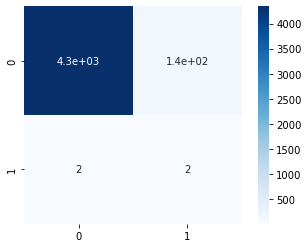

In [220]:
#random forest - random undersampling
print("Random Forest with random undersampling")
print("precision: "+str(precision_score(y_val_us,rf_us.predict(X_val_us))))
print("recall: "+str(recall_score(y_val_us,rf_us.predict(X_val_us))))
print("f1: "+str(f1_score(y_val_us,rf_us.predict(X_val_us))))
print("training score: " + str(100*rf_us.score(X_tr_us,y_tr_us)))
print("testing score: " + str(100*rf_us.score(X_test,y_test)))
under_confusion = confusion_matrix(y_test, rf_us.predict(X_test))
sns.heatmap(under_confusion, cmap=plt.cm.Blues,annot=True,square=True)

In [78]:
under_scores = cross_val_score(rf_us, X_us, y_us, scoring='f1', cv=cv, n_jobs=-1)
print(under_scores)

[1.         1.         1.         0.66666667 1.         0.66666667
 0.66666667 1.         0.8        1.         1.         0.
 1.         1.         1.         1.         0.5        1.
 0.5        1.         0.66666667 0.66666667 1.         1.
 0.         1.         0.66666667 1.         1.         1.        ]


In [88]:
under_pred = rf_us.predict(X_test)
under_prob = rf_us.predict_proba(X_test)
under_prob = under_prob[:,1]
under_precision, under_recall, under_thresholds = precision_recall_curve(y_test, under_prob)
under_f1 = f1_score(y_test,under_pred)
under_auc = auc(under_recall,under_precision)

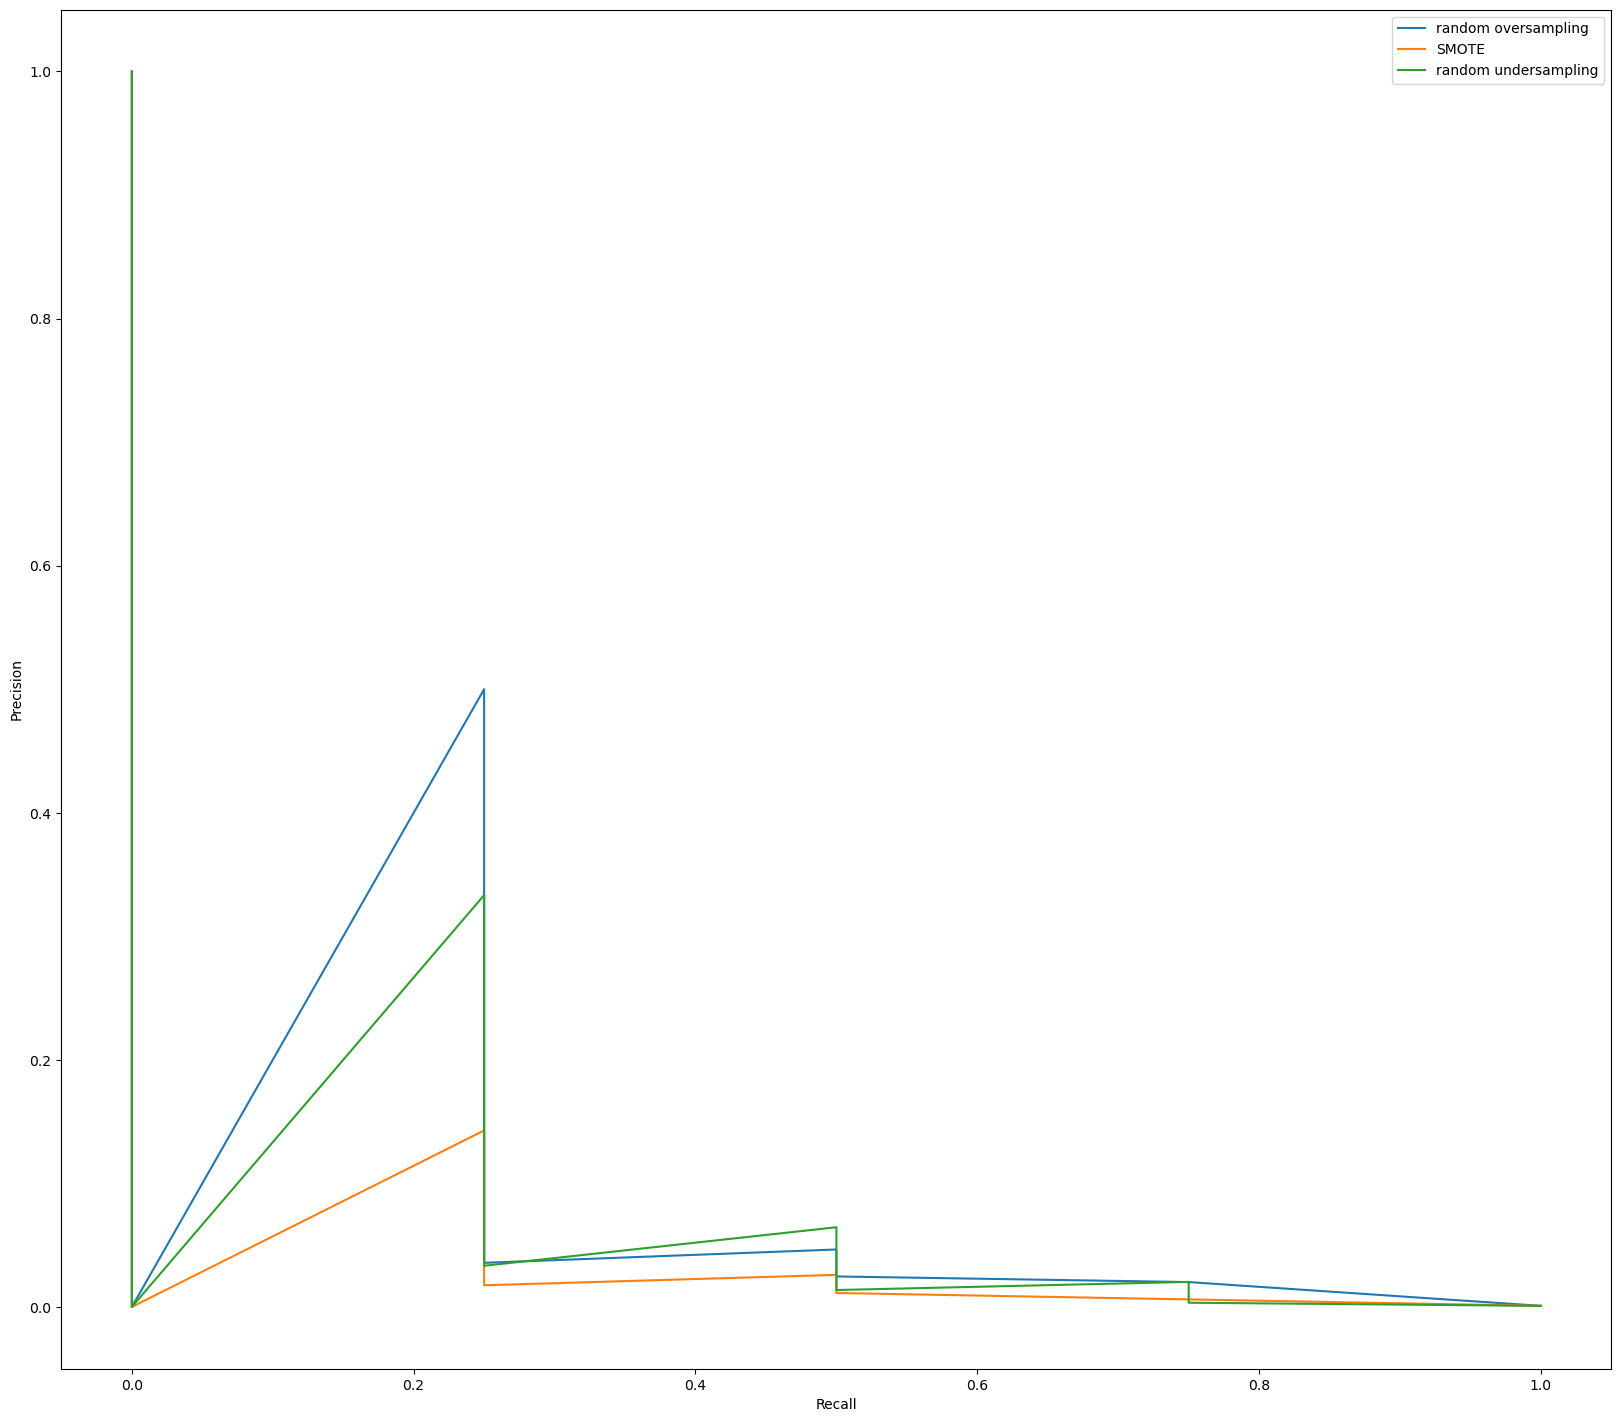

In [120]:
fig = plt.figure(figsize=(20, 18), dpi=100)
plt.plot(over_recall,over_precision,label="random oversampling")
plt.plot(smote_recall,smote_precision,label="SMOTE")
plt.plot(under_recall,under_precision,label="random undersampling")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.legend()
plt.savefig("randomforest.png")
plt.show();


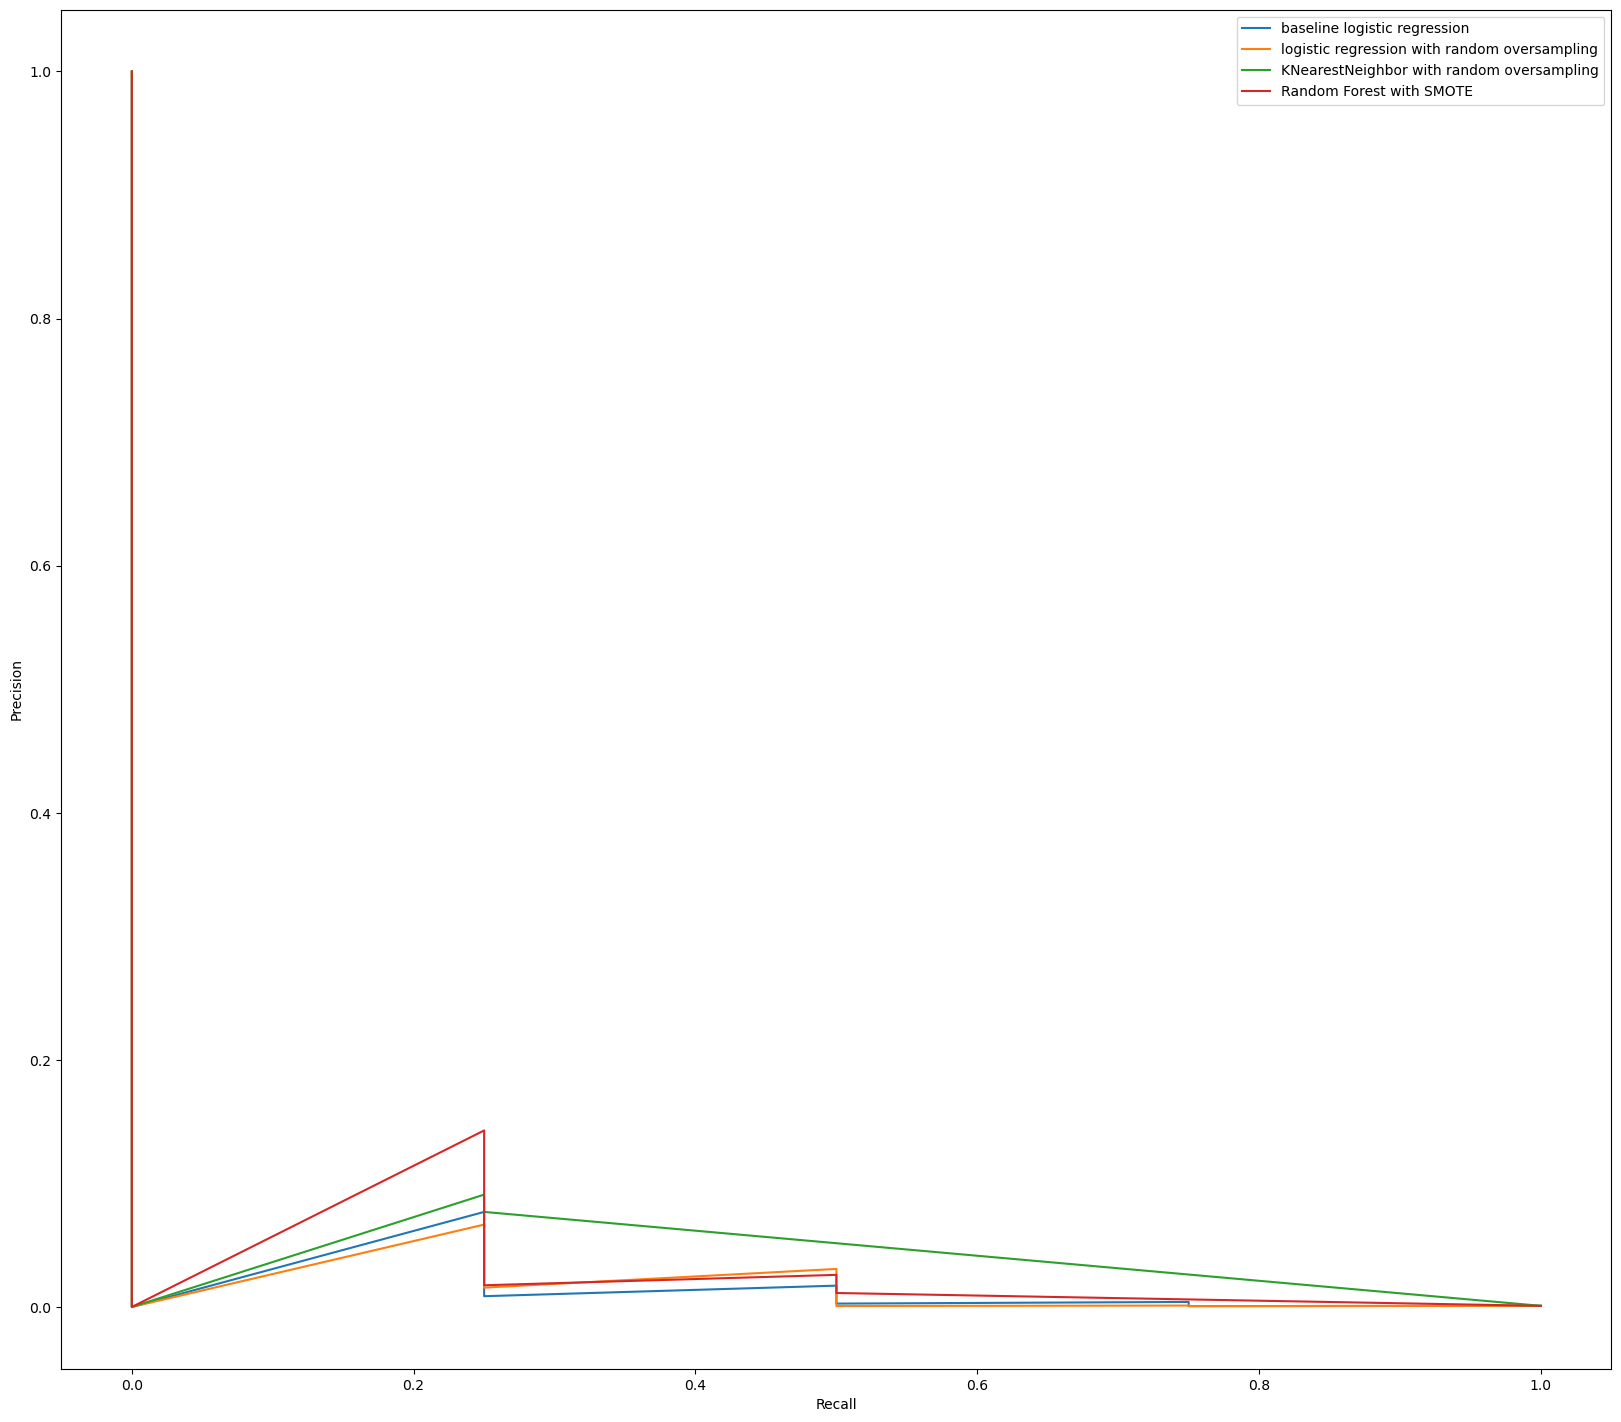

In [118]:
fig = plt.figure(figsize=(20, 18), dpi=100)
plt.plot(lg_base_recall,lg_base_precision,label="baseline logistic regression")
plt.plot(lg_ros_recall,lg_ros_precision,label="logistic regression with random oversampling")
plt.plot(knn_ros_recall,knn_ros_precision,label="KNearestNeighbor with random oversampling")
plt.plot(smote_recall,smote_precision,label="Random Forest with SMOTE")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.legend()
plt.savefig("models.png")
plt.show();


In [221]:
rf_smt.feature_importances_

array([0.11455129, 0.04049848, 0.10425272, 0.06006877, 0.33721087,
       0.0683221 , 0.0615758 , 0.0782408 , 0.06127258, 0.        ,
       0.07400659])

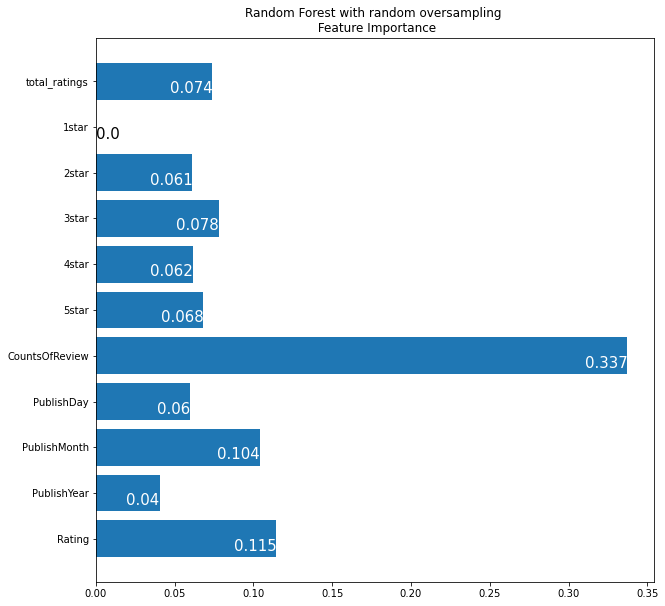

In [223]:
fig, ax = plt.subplots()
fig.set_size_inches(10, 10)
feature_val= rf_smt.feature_importances_
bars = ax.barh(["Rating","PublishYear","PublishMonth","PublishDay",
          "CountsOfReview","5star","4star","3star","2star","1star","total_ratings"], 
              feature_val)

ax.text(feature_val[0],0, str(round(feature_val[0],3)),color="white", ha="right",va="top",fontsize=15)
ax.text(feature_val[1],1, str(round(feature_val[1],3)),color="white", ha="right",va="top",fontsize=15)
ax.text(feature_val[2],2, str(round(feature_val[2],3)),color="white", ha="right",va="top",fontsize=15)
ax.text(feature_val[3],3, str(round(feature_val[3],3)),color="white", ha="right",va="top",fontsize=15)
ax.text(feature_val[4],4, str(round(feature_val[4],3)),color="white", ha="right",va="top",fontsize=15)
ax.text(feature_val[5],5, str(round(feature_val[5],3)),color="white", ha="right",va="top",fontsize=15)
ax.text(feature_val[6],6, str(round(feature_val[6],3)),color="white", ha="right",va="top",fontsize=15)
ax.text(feature_val[7],7, str(round(feature_val[7],3)),color="white", ha="right",va="top",fontsize=15)
ax.text(feature_val[8],8, str(round(feature_val[8],3)),color="white", ha="right",va="top",fontsize=15)
ax.text(feature_val[9],9, str(round(feature_val[9],3)),color="black", ha="left",va="top",fontsize=15)
ax.text(feature_val[10],10, str(round(feature_val[10],3)),color="white", ha="right",va="top",fontsize=15)

ax.set_title("Random Forest with random oversampling \n Feature Importance")
plt.savefig("impfeat1.png")
plt.show();

In [136]:
X_new = goodreads.drop(columns=["index","Name","Id","Authors","ISBN",
                                "PublishYear","PublishDay","Publisher","PagesNumber","Description",
                                "Subjects","1star","Bestseller"])
y_new = goodreads["Bestseller"]
X_new, X_new_test, y_new, y_new_test = train_test_split(X_new,y_new,test_size = 0.2, random_state = 5)


In [137]:
smt_new = imblearn.over_sampling.SMOTE(sampling_strategy=ratio,random_state=21)
X_new_smt, y_new_smt = smt_new.fit_resample(X_new,y_new)

In [138]:
X_new_tr_smt, X_new_val_smt, y_new_tr_smt, y_new_val_smt = train_test_split(X_new_smt,y_new_smt,test_size = 0.25, 
                                                                            random_state = 10)


In [139]:
new_rf_smt = RandomForestClassifier(n_estimators=100, random_state=1)
new_rf_smt.fit(X_new_tr_smt,y_new_tr_smt)

RandomForestClassifier(random_state=1)

In [140]:
new_smt_scores = cross_val_score(new_rf_smt, X_new_smt, y_new_smt, scoring='f1', cv=cv, n_jobs=-1)
print(new_smt_scores)

[0.81818182 0.8        0.95652174 0.73684211 0.72727273 0.76190476
 0.8        0.90909091 0.95652174 0.73684211 0.63157895 0.55555556
 0.86956522 0.95652174 0.85714286 0.88       0.85714286 0.7
 0.83333333 0.90909091 0.85714286 0.90909091 0.7        0.81818182
 0.90909091 0.86956522 0.83333333 0.76190476 0.81818182 0.76190476]


Updated Random Forest with SMOTE
precision: 0.9310344827586207
recall: 0.6923076923076923
f1: 0.7941176470588235
training score: 100.0
testing score: 99.88846754405532


<AxesSubplot:>

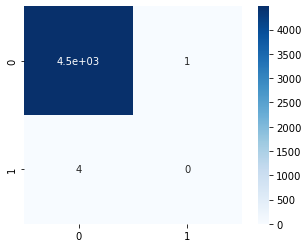

In [152]:
#  NEW random forest - SMOTE
print("Updated Random Forest with SMOTE")
print("precision: "+str(precision_score(y_new_val_smt,new_rf_smt.predict(X_new_val_smt))))
print("recall: "+str(recall_score(y_new_val_smt,new_rf_smt.predict(X_new_val_smt))))
print("f1: "+str(f1_score(y_new_val_smt,new_rf_smt.predict(X_new_val_smt))))
print("training score: " + str(100*new_rf_smt.score(X_new_tr_smt,y_new_tr_smt)))
print("testing score: " + str(100*new_rf_smt.score(X_new_test,y_new_test)))
new_smote_confusion = confusion_matrix(y_new_test, new_rf_smt.predict(X_new_test))
sns.heatmap(new_smote_confusion, cmap=plt.cm.Blues,annot=True,square=True)

In [142]:
new_rf_smt.feature_importances_

array([0.12276298, 0.11320483, 0.33402696, 0.08808735, 0.08804477,
       0.08846057, 0.07102294, 0.0943896 ])

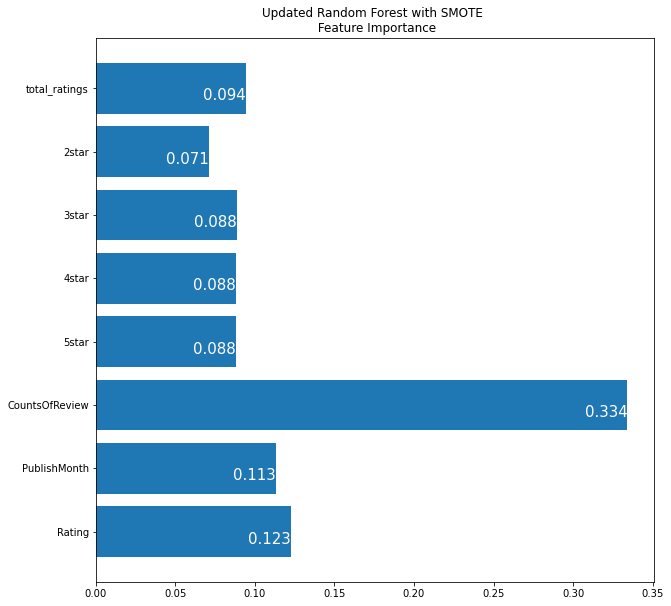

In [187]:

fig, ax = plt.subplots()

fig.set_size_inches(10, 10)
feature_val = new_rf_smt.feature_importances_
bars = ax.barh(["Rating","PublishMonth","CountsOfReview","5star","4star","3star","2star","total_ratings"],
               feature_val)


ax.text(feature_val[0],0, str(round(feature_val[0],3)),color="white", ha="right",va="top",fontsize=15)
ax.text(feature_val[1],1, str(round(feature_val[1],3)),color="white", ha="right",va="top",fontsize=15)
ax.text(feature_val[2],2, str(round(feature_val[2],3)),color="white", ha="right",va="top",fontsize=15)
ax.text(feature_val[3],3, str(round(feature_val[3],3)),color="white", ha="right",va="top",fontsize=15)
ax.text(feature_val[4],4, str(round(feature_val[4],3)),color="white", ha="right",va="top",fontsize=15)
ax.text(feature_val[5],5, str(round(feature_val[5],3)),color="white", ha="right",va="top",fontsize=15)
ax.text(feature_val[6],6, str(round(feature_val[6],3)),color="white", ha="right",va="top",fontsize=15)
ax.text(feature_val[7],7, str(round(feature_val[7],3)),color="white", ha="right",va="top",fontsize=15)

ax.set_title("Updated Random Forest with SMOTE \n Feature Importance")
plt.savefig("impfeat2.png")
plt.show();

[0.81818182 0.8        0.95652174 0.73684211 0.72727273 0.76190476
 0.8        0.90909091 0.95652174 0.73684211 0.63157895 0.55555556
 0.86956522 0.95652174 0.85714286 0.88       0.85714286 0.7
 0.83333333 0.90909091 0.85714286 0.90909091 0.7        0.81818182
 0.90909091 0.86956522 0.83333333 0.76190476 0.81818182 0.76190476]
Final Random Forest with random oversampling
precision: 0.9285714285714286
recall: 1.0
f1: 0.962962962962963
training score: 100.0
testing score: 99.88846754405532


<AxesSubplot:>

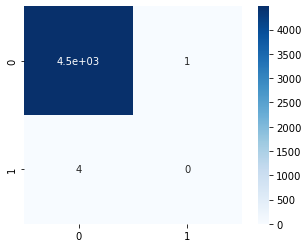

In [225]:
X_f = goodreads.drop(columns=["index","Name","Id","Authors","ISBN",
                                "PublishYear","PublishDay","Publisher","PagesNumber","Description",
                                "Subjects","5star","4star","3star","2star","1star","Bestseller"])
y_f = goodreads["Bestseller"]
X_f, X_f_test, y_f, y_f_test = train_test_split(X_f,y_f,test_size = 0.2, random_state = 5)


smt_f = imblearn.over_sampling.RandomOverSampler(sampling_strategy=ratio,random_state=21)
X_f_smt, y_f_smt = smt_f.fit_resample(X_f,y_f)

X_f_tr_smt, X_f_val_smt, y_f_tr_smt, y_f_val_smt = train_test_split(X_f_smt,y_f_smt,test_size = 0.25, 
                                                                            random_state = 10)

f_rf_smt = RandomForestClassifier(n_estimators=100, random_state=1)
f_rf_smt.fit(X_f_tr_smt,y_f_tr_smt)

f_smt_scores = cross_val_score(f_rf_smt, X_f_smt, y_f_smt, scoring='f1', cv=cv, n_jobs=-1)
print(new_smt_scores)

#  Final random forest - random oversampling
print("Final Random Forest with random oversampling")
print("precision: "+str(precision_score(y_f_val_smt,f_rf_smt.predict(X_f_val_smt))))
print("recall: "+str(recall_score(y_f_val_smt,f_rf_smt.predict(X_f_val_smt))))
print("f1: "+str(f1_score(y_f_val_smt,f_rf_smt.predict(X_f_val_smt))))
print("training score: " + str(100*f_rf_smt.score(X_f_tr_smt,y_f_tr_smt)))
print("testing score: " + str(100*f_rf_smt.score(X_f_test,y_f_test)))
f_smote_confusion = confusion_matrix(y_f_test, f_rf_smt.predict(X_f_test))
sns.heatmap(f_smote_confusion, cmap=plt.cm.Blues,annot=True,square=True)

In [226]:
f_rf_smt.feature_importances_

array([0.21422812, 0.13398318, 0.41879603, 0.23299267])

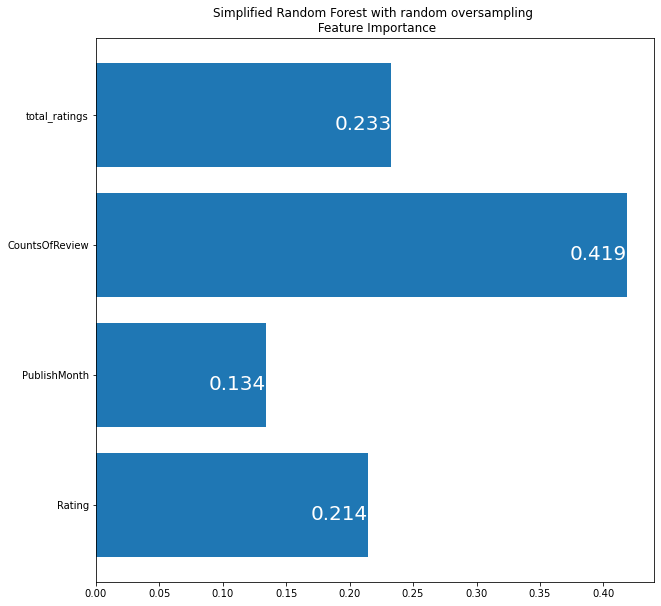

In [229]:

fig, ax = plt.subplots()

fig.set_size_inches(10, 10)
feature_val=f_rf_smt.feature_importances_
bars = ax.barh(["Rating","PublishMonth","CountsOfReview","total_ratings"],
               feature_val)

ax.text(feature_val[0],0, str(round(feature_val[0],3)),color="white", ha="right",va="top",fontsize=20)
ax.text(feature_val[1],1, str(round(feature_val[1],3)),color="white", ha="right",va="top",fontsize=20)
ax.text(feature_val[2],2, str(round(feature_val[2],3)),color="white", ha="right",va="top",fontsize=20)
ax.text(feature_val[3],3, str(round(feature_val[3],3)),color="white", ha="right",va="top",fontsize=20)

ax.set_title("Simplified Random Forest with random oversampling \n Feature Importance")
plt.savefig("impfeat4.png")
plt.show();